In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [2]:
noreuse = pd.read_csv('noreuse.stage3.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('reuse.stage3.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147271680
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156875
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,144252928
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1323874
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26551155
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1275419
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26169298
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3714
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,741
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,3231


In [3]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [4]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,144252928,reuse_across_ctor_disabled,147271680
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1323874,reuse_across_ctor_disabled,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26551155,reuse_across_ctor_disabled,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1275419,reuse_across_ctor_disabled,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26169298,reuse_across_ctor_disabled,26156875
...,...,...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3714,reuse_across_ctor_disabled,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0,reuse_across_ctor_disabled,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,741,reuse_across_ctor_disabled,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,3231,reuse_across_ctor_disabled,2894


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Elab/MatchAltView.lean,459,1612,1153,71.526055
1,Init/Data/OfScientific.lean,429,1383,954,68.980477
2,Init/Control.lean,545,1619,1074,66.337245
3,Lean/Server/Rpc/RequestHandling.lean,1122,2933,1811,61.745653
4,Init/Data/Fin/Log2.lean,496,1295,799,61.698842
...,...,...,...,...,...
845,Lean/Compiler/NoncomputableAttr.lean,911,303,-608,-200.660066
846,Init/Data/Nat/Log2.lean,1209,370,-839,-226.756757
847,Init/Data/Int/DivModLemmas.lean,18697,5255,-13442,-255.794481
848,Lean/Data/HashMap.lean,14721,2395,-12326,-514.655532


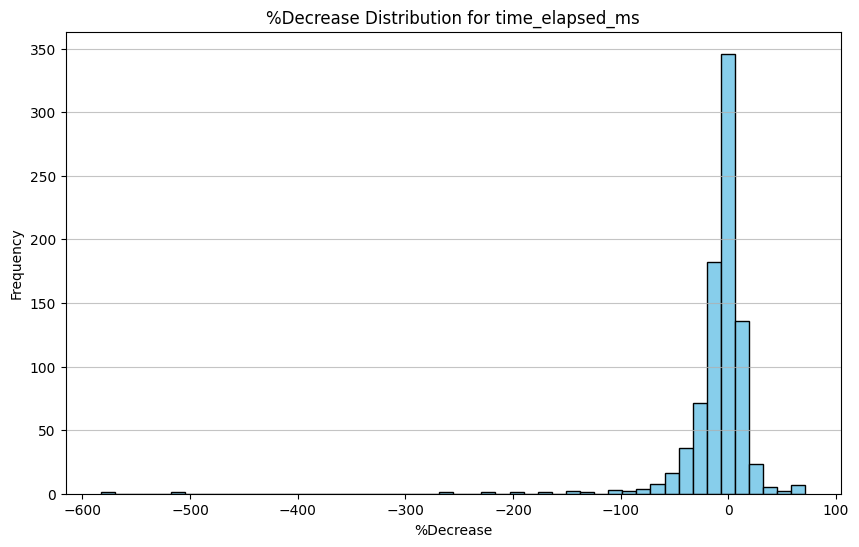

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Coe.lean,73138176,76677120,3538944,4.615385
1,Init/Data/Nat/Bitwise/Basic.lean,88686592,92622848,3936256,4.249768
2,Init/Data/Nat/Power2.lean,108945408,113676288,4730880,4.161712
3,Init/Data/Sum.lean,81477632,84893696,3416064,4.023931
4,Init/Data/Prod.lean,81752064,85168128,3416064,4.010965
...,...,...,...,...,...
845,Lean/Elab/Tactic/ShowTerm.lean,291794944,292450304,655360,0.224093
846,Lean/Elab/PreDefinition/WF/GuessLex.lean,385642496,386064384,421888,0.109279
847,Lake/Load.lean,281849856,281870336,20480,0.007266
848,Lean/MetavarContext.lean,207978496,205668352,-2310144,-1.123237


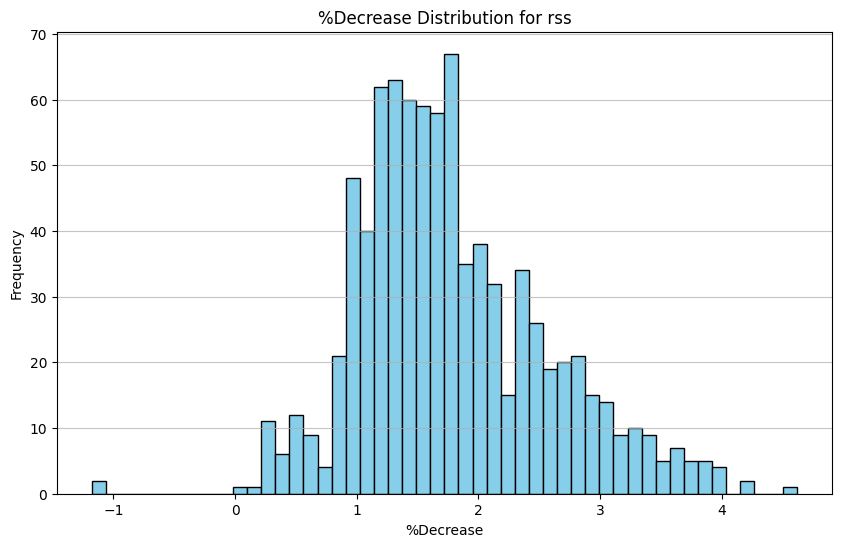

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/Coe.lean,11119221,11295174,175953,1.557771
1,Init/Data/Format/Basic.lean,6930158,7014208,84050,1.198282
2,Lean/Data/NameMap.lean,2876719,2909776,33057,1.136067
3,Lean/Data/RBMap.lean,17211893,17391941,180048,1.035238
4,Lean/Data/Lsp/Internal.lean,7883435,7965522,82087,1.030529
...,...,...,...,...,...
845,Lean/Meta/Offset.lean,12151188,12012044,-139144,-1.158371
846,Lean/Compiler/IR/EmitLLVM.lean,89599737,88334306,-1265431,-1.432548
847,Lean/ParserCompiler.lean,40936243,40214747,-721496,-1.794108
848,Lean/Parser.lean,10810692,10486972,-323720,-3.086878


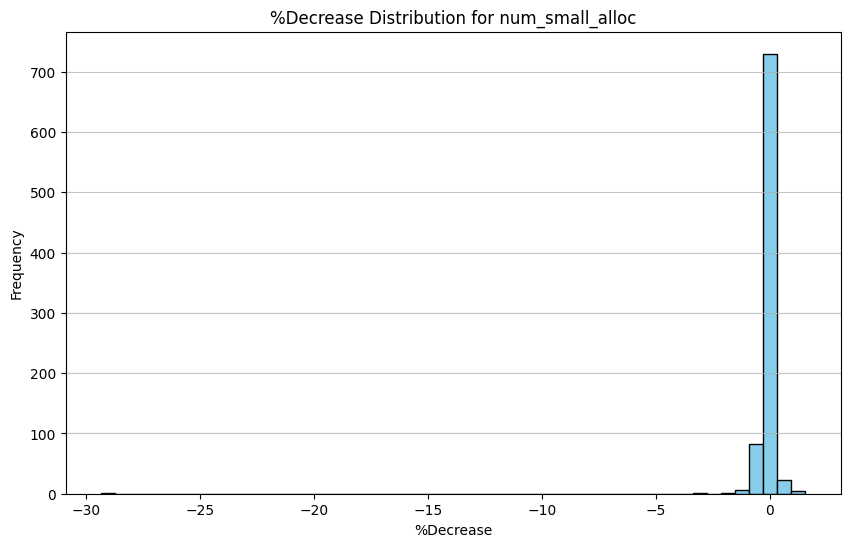

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Data/NameMap.lean,132401,136801,4400,3.216351
1,Init/Data/Format/Basic.lean,317213,327475,10262,3.133674
2,Lean/Data/RBMap.lean,687521,707285,19764,2.794347
3,Lean/Data/Lsp/Internal.lean,357624,366489,8865,2.418899
4,Lean/Meta/ReduceEval.lean,136025,139063,3038,2.184621
...,...,...,...,...,...
845,Lean/Meta/GeneralizeVars.lean,458728,448399,-10329,-2.303529
846,Lean/Meta/Tactic/Clear.lean,248569,242735,-5834,-2.403444
847,Lean/Meta/Offset.lean,525672,510302,-15370,-3.011942
848,Lean/ParserCompiler.lean,1484227,1412468,-71759,-5.080398


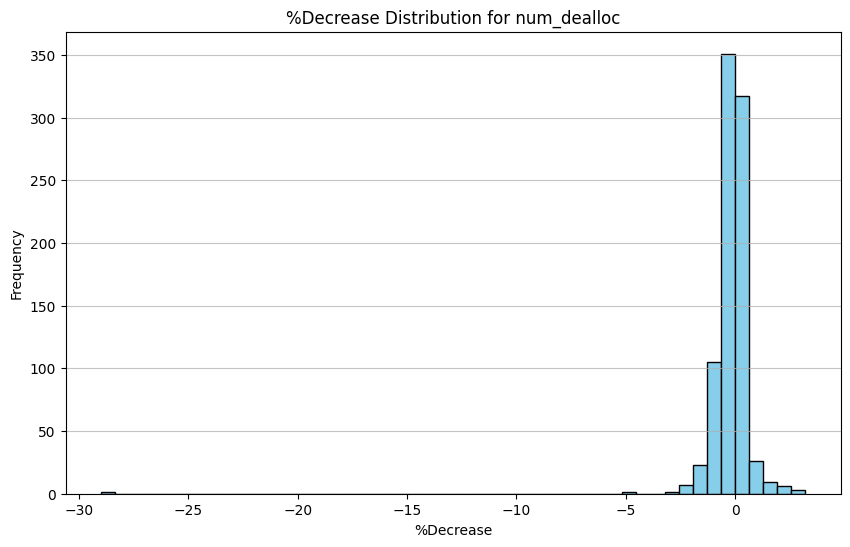

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/Coe.lean,10633166,10805956,172790,1.599026
1,Lean/Data/NameMap.lean,2539397,2571635,32238,1.253599
2,Init/Data/Format/Basic.lean,6639229,6720133,80904,1.203905
3,Lean/Data/Lsp/Internal.lean,7473187,7552877,79690,1.055095
4,Lean/Data/RBMap.lean,16802960,16978739,175779,1.035289
...,...,...,...,...,...
845,Lean/Meta/Offset.lean,11677495,11543002,-134493,-1.165148
846,Lean/Compiler/IR/EmitLLVM.lean,88862210,87608445,-1253765,-1.431101
847,Lean/ParserCompiler.lean,40238881,39539895,-698986,-1.767799
848,Lean/Parser.lean,10239601,9919065,-320536,-3.231514


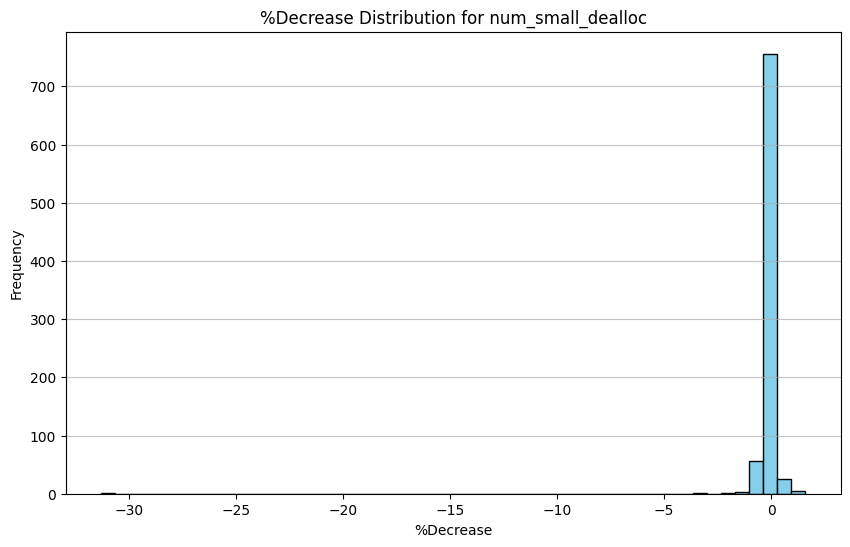

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Data/RBMap.lean,381810,619565,237755,38.374505
1,Init/Data/Format/Basic.lean,158022,237122,79100,33.358356
2,Lake/CLI/Main.lean,615643,890661,275018,30.877966
3,Lean/Meta/Coe.lean,175499,251724,76225,30.281181
4,Lake/Config/Workspace.lean,229369,324797,95428,29.380813
...,...,...,...,...,...
845,Lean/Meta/Offset.lean,286961,237825,-49136,-20.660570
846,Lean/Compiler/LCNF/CompatibleTypes.lean,56360,46534,-9826,-21.115743
847,Lean/Meta/Match/Value.lean,28831,23423,-5408,-23.088417
848,Lean/Compiler/IR/ExpandResetReuse.lean,120791,95007,-25784,-27.139053


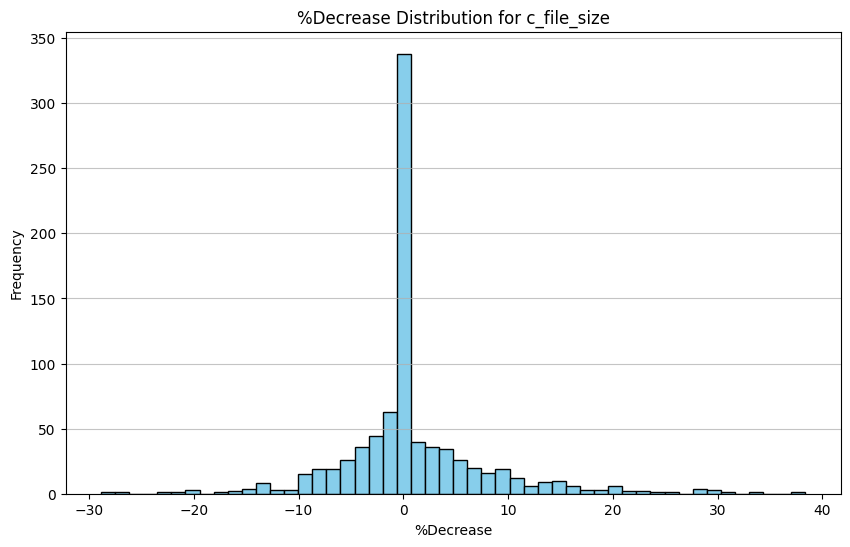

In [5]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,21038,4036516
Init/Data/Int/DivModLemmas.lean,18697,1737399
Lean/Elab/Do.lean,17937,6328556
Lean/PrettyPrinter/Delaborator/Builtins.lean,15769,5240305
Lean/Data/RBMap.lean,15356,731555
...,...,...
Lean/Elab/InfoTree.lean,344,79173
Lean/Meta/Tactic/LinearArith/Basic.lean,342,84644
Lean/Elab/RecAppSyntax.lean,333,76432


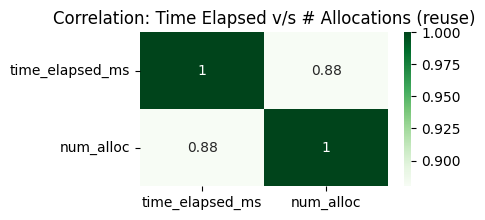

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,20808,4034116
Lean/Elab/Do.lean,18456,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,14916,5228121
Lean/Compiler/IR/EmitLLVM.lean,13865,3635984
Lean/Elab/App.lean,12707,4005911
...,...,...
Lean/Compiler/NoncomputableAttr.lean,303,71969
Lean/PrettyPrinter/Delaborator/Attributes.lean,299,88537
Init/Omega/Logic.lean,293,75747


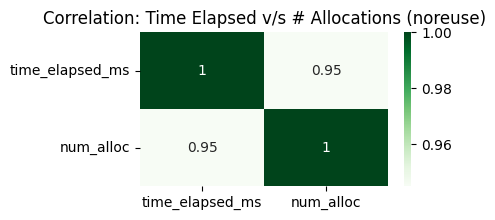

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,21038,4036516
Lean/Elab/Tactic/Omega/Frontend.lean,20808,4034116
Init/Data/Int/DivModLemmas.lean,18697,1737399
Lean/Elab/Do.lean,18456,6328540
Lean/Elab/Do.lean,17937,6328556
...,...,...
Lean/Compiler/NoncomputableAttr.lean,303,71969
Lean/PrettyPrinter/Delaborator/Attributes.lean,299,88537
Init/Omega/Logic.lean,293,75747


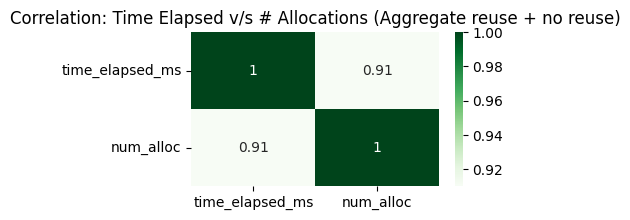

In [6]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: